In [ ]:
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs, make_classification

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, silhouette_samples

### Links:

https://en.wikipedia.org/wiki/Silhouette_(clustering)

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

## Generate and Plot the Data

In [481]:
centers_neat = [(-10, 10), (0, -5), (10, 5)]

x_neat, _ = make_blobs(n_samples=5000, centers=centers_neat, cluster_std=2, random_state=2)

x_messy, _ = make_classification(n_samples=5000, n_classes=3, random_state=49, n_clusters_per_class=1, class_sep=1.3, shuffle=False)

km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

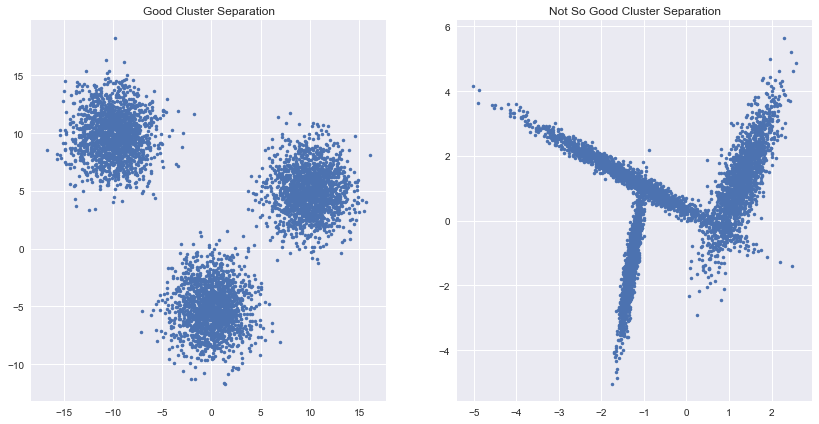

In [482]:
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(14,7))
plt.subplot(121, title='Good Cluster Separation')
plt.plot(x_neat[:,0], x_neat[:,1], '.')
plt.subplot(122, title='Not So Good Cluster Separation')
plt.plot(x_messy[:,0], x_messy[:,1], '.')
plt.show()

## Illustrate Ineffecient Clustering of Messy Data by K-Means

In [483]:
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

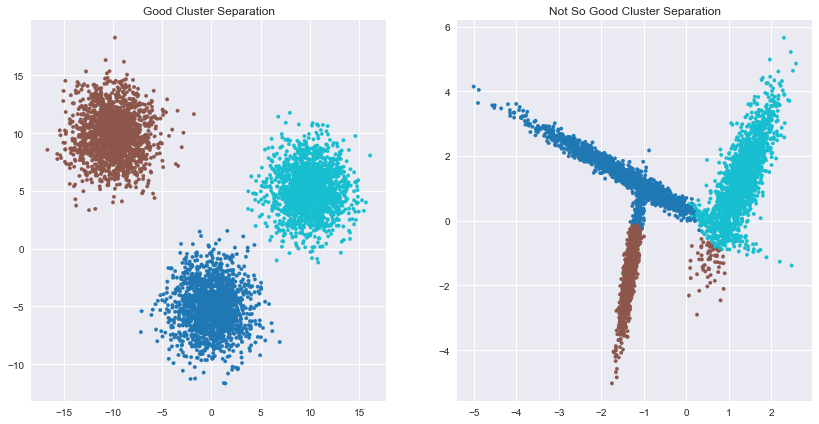

In [484]:
plt.figure(figsize=(14,7))
plt.subplot(121, title='Good Cluster Separation')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap, marker='.')
plt.subplot(122, title='Not So Good Cluster Separation')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap, marker='.')
plt.show()

## Illustrate Improved Clustering by Gaussian Mixture Model

In [485]:
gmModel = GaussianMixture(n_components=3)
gm_neat = gmModel.fit(x_neat).predict(x_neat)
gm_messy = gmModel.fit(x_messy).predict(x_messy)

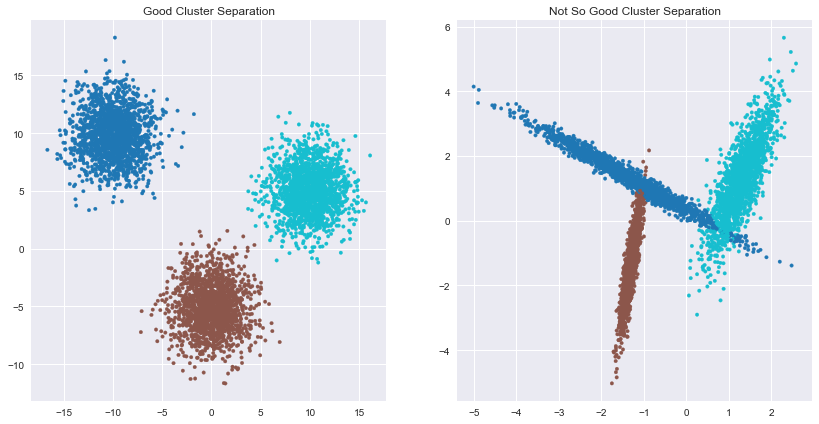

In [486]:
plt.figure(figsize=(14,7))
plt.subplot(121, title='Good Cluster Separation')
plt.scatter(x_neat[:,0], x_neat[:,1], c=gm_neat, cmap=cmap, marker='.')
plt.subplot(122, title='Not So Good Cluster Separation')
plt.scatter(x_messy[:,0], x_messy[:,1], c=gm_messy, cmap=cmap, marker='.')
plt.show()

## Silhouette Analysis

In [487]:
def getAvgDistClst(aClst, dtPt, dtPtClst):
    thisDiff = aClst-dtPt
    thisDist = np.sqrt(np.sum(thisDiff**2,1))
    return np.mean(thisDist)

#### On Neat Data...

In [488]:
ss_neat = []

for dp in range(x_neat.shape[0]):
    dtPt = x_neat[dp,:] # a datapoint
    dtPtClst = km_neat[dp] # the cluster to which the datapoint belongs
    otherClst = [i for i in list(set(km_neat)) if i != dtPtClst] # the other clusters
    
    a = getAvgDistClst(x_neat[km_neat==dtPtClst,:], dtPt, dtPtClst)
    
    possNghbrs = []

    for i in otherClst:
        possNghbrs.append((getAvgDistClst(x_neat[km_neat==i,:], dtPt, i), i))

    b = np.min([i[0] for i in possNghbrs])
    
    s = (b-a)/np.max([a,b])
    
    ss_neat.append(s)

print 'Avg Silhouette Score (Neat KMeans):', np.mean(ss_neat)

0.76756881679633282

#### On Messy KMeans Data...

In [489]:
ss_messy_k = []

for dp in range(x_messy.shape[0]):
    dtPt = x_messy[dp,:] # a datapoint
    dtPtClst = km_messy[dp] # the cluster to which the datapoint belongs
    otherClst = [i for i in list(set(km_messy)) if i != dtPtClst] # the other clusters
    
    a = getAvgDistClst(x_messy[km_messy==dtPtClst,:], dtPt, dtPtClst)
    
    possNghbrs = []

    for i in otherClst:
        possNghbrs.append((getAvgDistClst(x_messy[km_messy==i,:], dtPt, i), i))

    b = np.min([i[0] for i in possNghbrs])
    
    s = (b-a)/np.max([a,b])
    
    ss_messy_k.append(s)
    
print 'Avg Silhouette Score (Messy KMeans):', np.mean(ss_messy_k)

0.12075099967595308

#### On Messy GMM Data...

In [490]:
ss_messy_g = []

for dp in range(x_messy.shape[0]):
    dtPt = x_messy[dp,:] # a datapoint
    dtPtClst = gm_messy[dp] # the cluster to which the datapoint belongs
    otherClst = [i for i in list(set(gm_messy)) if i != dtPtClst] # the other clusters
    
    a = getAvgDistClst(x_messy[gm_messy==dtPtClst,:], dtPt, dtPtClst)
    
    possNghbrs = []

    for i in otherClst:
        possNghbrs.append((getAvgDistClst(x_messy[gm_messy==i,:], dtPt, i), i))

    b = np.min([i[0] for i in possNghbrs])
    
    s = (b-a)/np.max([a,b])
    
    ss_messy_g.append(s)
    
print 'Avg Silhouette Score (Messy GMM):', np.mean(ss_messy_g)

0.10979855179389429

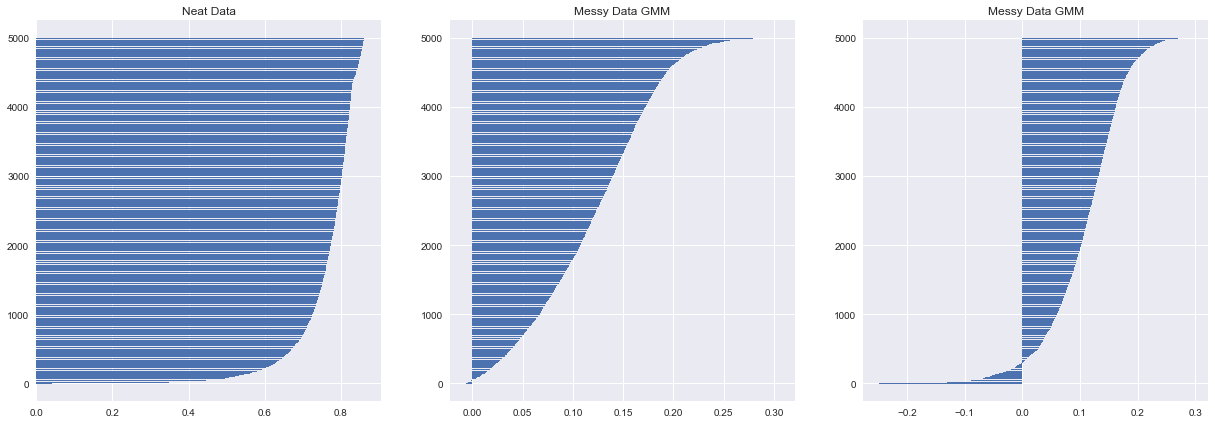

In [491]:
plt.figure(figsize=[21,7])
plt.subplot(131, title = 'Neat Data')
plt.barh(range(len(ss_neat)), sorted(ss_neat))
plt.subplot(132, title = 'Messy Data GMM')
plt.barh(range(len(ss_messy_k)), sorted(ss_messy_k))
plt.subplot(133, title = 'Messy Data GMM')
plt.barh(range(len(ss_messy_g)), sorted(ss_messy_g))
plt.show()

In [492]:
print '\nMin, Max, Mean (Silhouette x_neat KMeans):', [min(ss_neat),max(ss_neat),np.mean(ss_neat)]
print '\nMin, Max, Mean (Silhouette x_messy KMeans):', [min(ss_messy_k),max(ss_messy_k),np.mean(ss_messy_k)]
print '\nMin, Max, Mean (Silhouette x_messy GMM):', [min(ss_messy_g),max(ss_messy_g),np.mean(ss_messy_g)]


Min, Max, Mean (Silhouette x_neat KMeans): [0.041758194478163237, 0.86245330701663858, 0.76756881679633282]

Min, Max, Mean (Silhouette x_messy KMeans): [-0.0068108828088399168, 0.30489276433040879, 0.12075099967595308]

Min, Max, Mean (Silhouette x_messy GMM): [-0.24828474191093813, 0.29516558496513196, 0.10979855179389429]


### Evaluating Average Silhouette Scores Using Scikit's "silhouette_score" and "silhouette_samples" Modules

In [493]:
print 'Avg Silhouette Score (Neat KMeans):', silhouette_score(x_neat,km_neat)
print 'Avg Silhouette Score (Messy KMeans):', silhouette_score(x_messy,km_messy)
print 'Avg Silhouette Score (Messy GMM):', silhouette_score(x_messy,gm_messy)

Avg Silhouette Score (Neat KMeans): 0.767429273697
Avg Silhouette Score (Messy KMeans): 0.120223609578
Avg Silhouette Score (Messy GMM): 0.109267638311


In [494]:
ss_neat_x = silhouette_samples(x_neat, km_neat)
ss_messy_k_x = silhouette_samples(x_messy, km_messy)
ss_messy_g_x = silhouette_samples(x_messy, gm_messy)

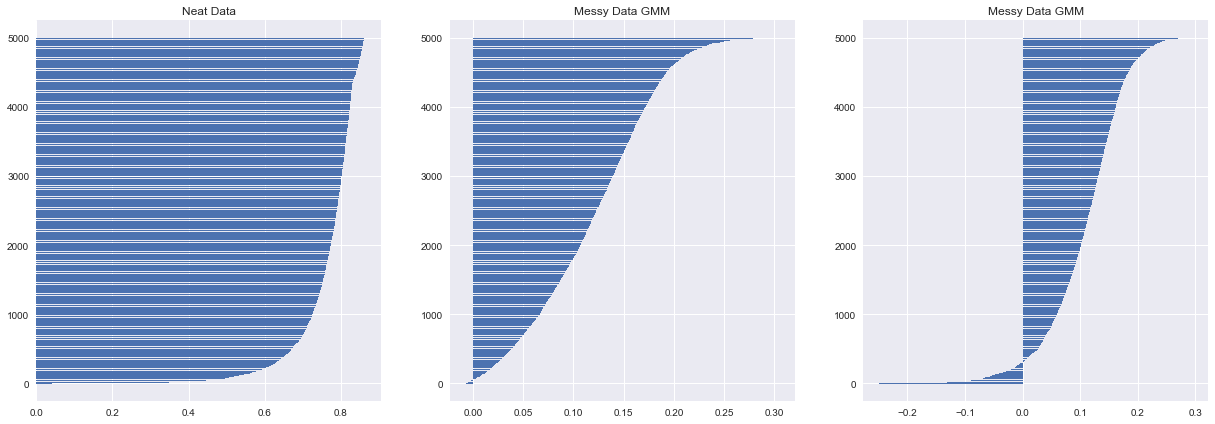

In [495]:
plt.figure(figsize=[21,7])
plt.subplot(131, title = 'Neat Data')
plt.barh(range(len(ss_neat_x)), sorted(ss_neat_x))
plt.subplot(132, title = 'Messy Data GMM')
plt.barh(range(len(ss_messy_k_x)), sorted(ss_messy_k_x))
plt.subplot(133, title = 'Messy Data GMM')
plt.barh(range(len(ss_messy_g_x)), sorted(ss_messy_g_x))
plt.show()

#### Evaluate Ideal Number of Clusters by Silhouette Analysis

In [ ]:
silScores = []

numClusters = range(2,31)

for i in numClusters:
    
    km_neat = KMeans(n_clusters=i, random_state=2).fit_predict(x_neat)
    km_messy = KMeans(n_clusters=i, random_state=2).fit_predict(x_messy)
    gmModel = GaussianMixture(n_components=i)
    gm_messy = gmModel.fit(x_messy).predict(x_messy)
    
    sc_neat = silhouette_score(x_neat,km_neat)
    sc_messy_k = silhouette_score(x_messy,km_messy)
    sc_messy_g = silhouette_score(x_messy,gm_messy)
    
    silScores.append((sc_neat, sc_messy_k, sc_messy_g))

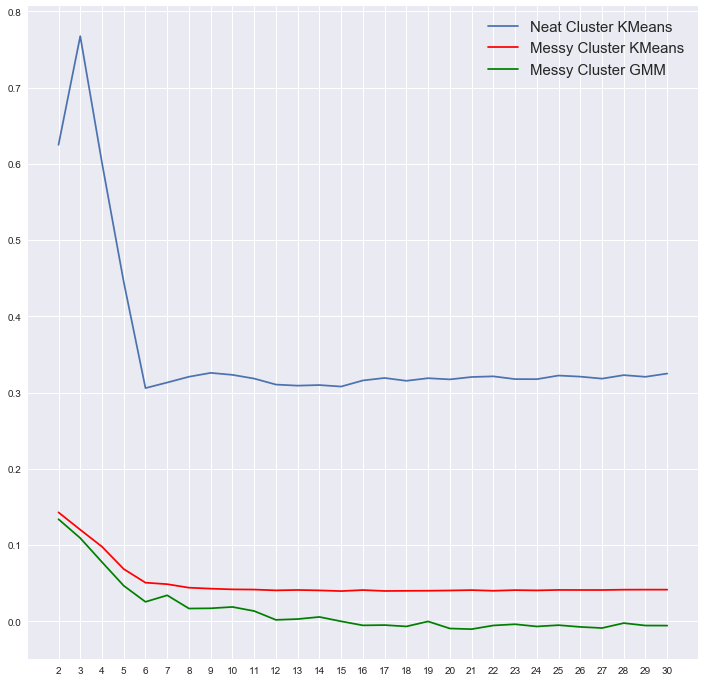

In [509]:
plt.figure(figsize = [12,12])
plt.plot(numClusters, [i[0] for i in silScores])
plt.plot(numClusters, [i[1] for i in silScores], 'r')
plt.plot(numClusters, [i[2] for i in silScores], 'g')
plt.xticks(numClusters)
plt.legend(['Neat Cluster KMeans', 'Messy Cluster KMeans', 'Messy Cluster GMM'], fontsize=15)
plt.show()